Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix for Logistic Regression:
 [[83403  1892]
 [   18   130]]
Confusion Matrix for Random Forest:
 [[85281    14]
 [   32   116]]


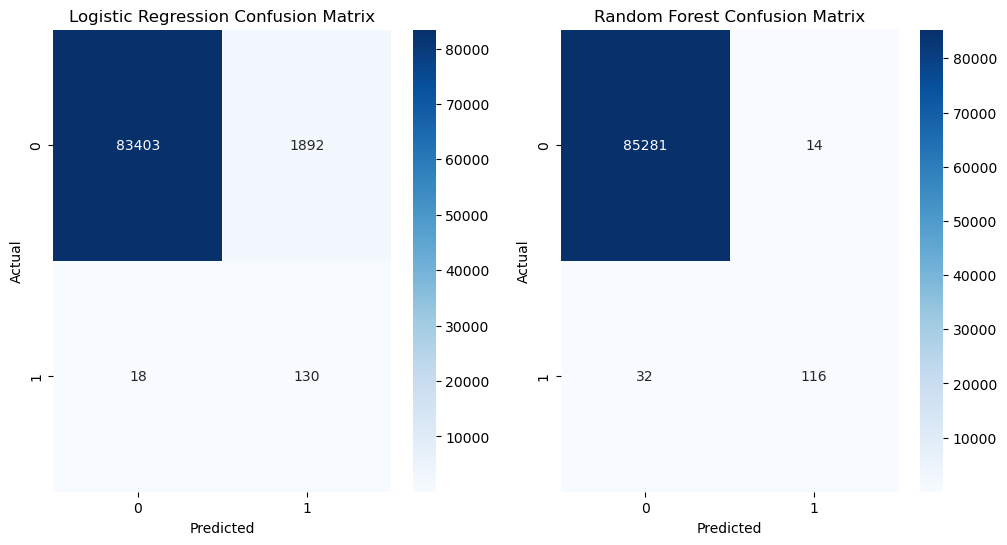

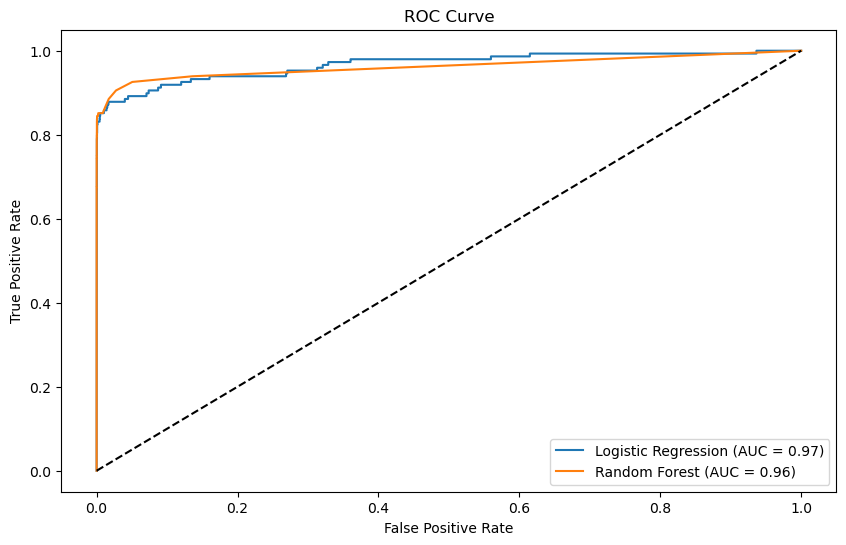

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression with increased max_iter
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

# Evaluate the models
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

# ROC Curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()